Name: Prachi Mehta

Batch: A

UID: 2018130025

Roll No: 17

BE COMPS

In [ ]:
#importing pandas,matplotlib,numpy,seaborn library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the csv file and storing it in dataframe
df = pd.read_csv('/content/sample_data/auto-mpg.csv',encoding='latin-1')
print(df)

      mpg  cylinders  ...  origin                   car name
0    18.0          8  ...       1  chevrolet chevelle malibu
1    15.0          8  ...       1          buick skylark 320
2    18.0          8  ...       1         plymouth satellite
3    16.0          8  ...       1              amc rebel sst
4    17.0          8  ...       1                ford torino
..    ...        ...  ...     ...                        ...
393  27.0          4  ...       1            ford mustang gl
394  44.0          4  ...       2                  vw pickup
395  32.0          4  ...       1              dodge rampage
396  28.0          4  ...       1                ford ranger
397  31.0          4  ...       1                 chevy s-10

[398 rows x 9 columns]


Dropping the categorical feature from the dataframe for further analysis


In [ ]:
df.drop(['car name'],axis=1,inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


Summary of dataset

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Checking for null values in dataset

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

There are no null values in our dataset. But the horsepower feature in our dataframe contains '?' which need to be removed from the dataframe , so we will drop the rows in the dataframe where horsepower is equal to '?'.

In [ ]:
df = df[df.horsepower != '?']

In [ ]:
# Checking for null values after dropping the rows
'?' in df

False

In [ ]:
df.shape

(392, 8)

In [ ]:
df['horsepower'].astype(str).astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: int64

checking the correlation of all the features of the dataset w.r.t miles-per-gallon i.e. 'mpg' and arranging the values in ascending order

In [ ]:
df.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

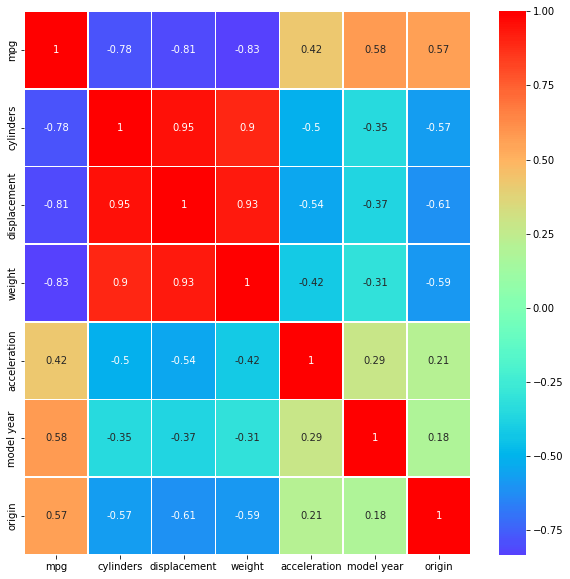

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


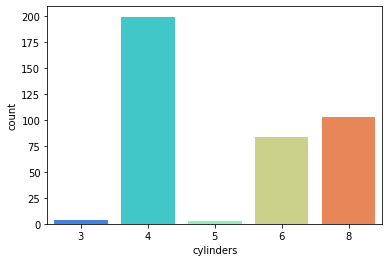

In [ ]:
sns.countplot(df.cylinders,data=df,palette = "rainbow")
plt.show()

From the above above plot we can visualize that there are maximum number of 4 cylinder vehicles. Most of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


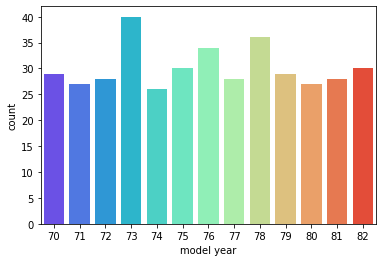

In [ ]:
sns.countplot(df['model year'],palette = "rainbow")
plt.show()

Maximum number of vehicles are of the year 1973 and minumum number of the year 1974.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


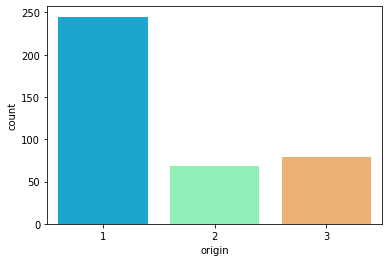

In [ ]:
sns.countplot(df.origin,palette = "rainbow")
plt.show()

Most of the vehicles are from region 1 as compared to the other two regions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


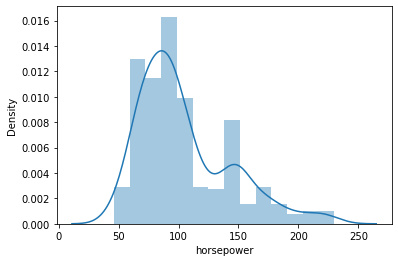

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'])
sns.distplot(df['horsepower'])
plt.show()

From the above plot we can see the distribution of the horsepower of the vehicles.
We can visualize that most of the vehicles have around 75-110 horsepower and only few vehicles have horsepoer above 200.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


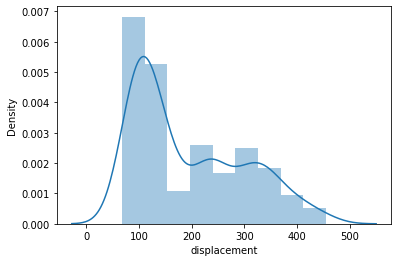

In [ ]:
sns.distplot(df.displacement,rug=False)
plt.show()

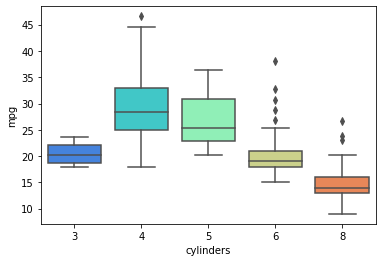

In [ ]:
sns.boxplot(y='mpg',x='cylinders',data=df,palette = "rainbow")
plt.show()

We can visualize that mpg of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.

From the above result we can carry out the inference that for most of the people mileage(mpg) is one of the major factor while buying a vehicle.

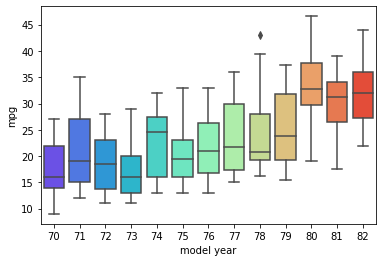

In [ ]:
sns.boxplot(y='mpg',x='model year',data=df,palette = "rainbow")
plt.show()

With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.

In [ ]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)
print(model.score(X_test,Y_test))


0.8363664681024057


In [ ]:
for i in range(0,len(Y_test)):
  print('For ',i,' actual value:',Y_test[i],'predicted value:',Y_pred[i])

For  0  actual value: 28.0 predicted value: 25.959767579524392
For  1  actual value: 22.3 predicted value: 25.607885005935206
For  2  actual value: 12.0 predicted value: 10.612251737860536
For  3  actual value: 38.0 predicted value: 32.303521977508964
For  4  actual value: 33.8 predicted value: 33.227660056957305
For  5  actual value: 19.4 predicted value: 23.483161081105546
For  6  actual value: 38.1 predicted value: 34.4746147144665
For  7  actual value: 30.0 predicted value: 25.990325889649757
For  8  actual value: 20.0 predicted value: 20.507764414024454
For  9  actual value: 20.0 predicted value: 27.0544448940902
For  10  actual value: 27.0 predicted value: 27.751609359204902
For  11  actual value: 16.5 predicted value: 13.690194077066511
For  12  actual value: 24.5 predicted value: 25.151396917717104
For  13  actual value: 11.0 predicted value: 8.726504311207997
For  14  actual value: 16.9 predicted value: 16.702542015554645
For  15  actual value: 33.7 predicted value: 33.1110340

In [ ]:
print(model.intercept_)
print(model.coef_)

-16.891066714054954
[-0.39034654  0.01743605 -0.01026837 -0.00678792  0.14137908  0.74133968
  1.12829334]


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [ ]:
print(rms)

3.189152504297502


**Conclusion:**

1) Performed linear regression on AutoMPG dataset to predict Miles Per Gallon

2) Performed Exploratory data analysis on dataset 

3) Got and predicted the results of model and printed the accuracy 
